In [1]:
import torch
print(torch.cuda.is_available())

True


Species count: {'asian black hornbill': 16, 'banded civet': 192, 'banded langur': 3, 'banded linsang': 7, 'bay cat': 17, 'bearcat': 4, 'bearded pig': 213, 'binturong': 19, 'bird sp': 6, 'blue-banded pita': 12, 'bornean crested fireback': 6, 'bornean ground-cuckoo': 29, 'bornean porcupine': 11, 'bornean yellow muntjac': 154, "bulwer's pheasant": 372, 'clouded leopard': 9, 'creseted serpent eagle': 19, 'emerald dove': 268, 'great argus': 349, 'horse squirrel': 71, 'kinabalu squirrel': 5, 'leopard cat': 130, 'long tailed macaque': 218, 'long tailed porcupine': 46, 'malayan civet': 272, 'malayan porcupine': 305, 'malays weasel': 1, 'marbled cat': 50, 'maroon langur': 24, 'mask palm civet': 53, 'mongoose': 181, 'monitor lizard': 15, 'moonrat': 17, 'mouse sp': 63, 'mousedeer sp': 308, 'muntjac sp': 306, 'orangutan': 4, 'otter civet': 2, 'pangolin': 32, 'pig tailed macaque': 426, 'rat sp': 47, 'red muntjac': 6, 'roughneck monitor lizard': 9, 'roulroul': 61, 'sambar deer': 302, 'slow loris': 1

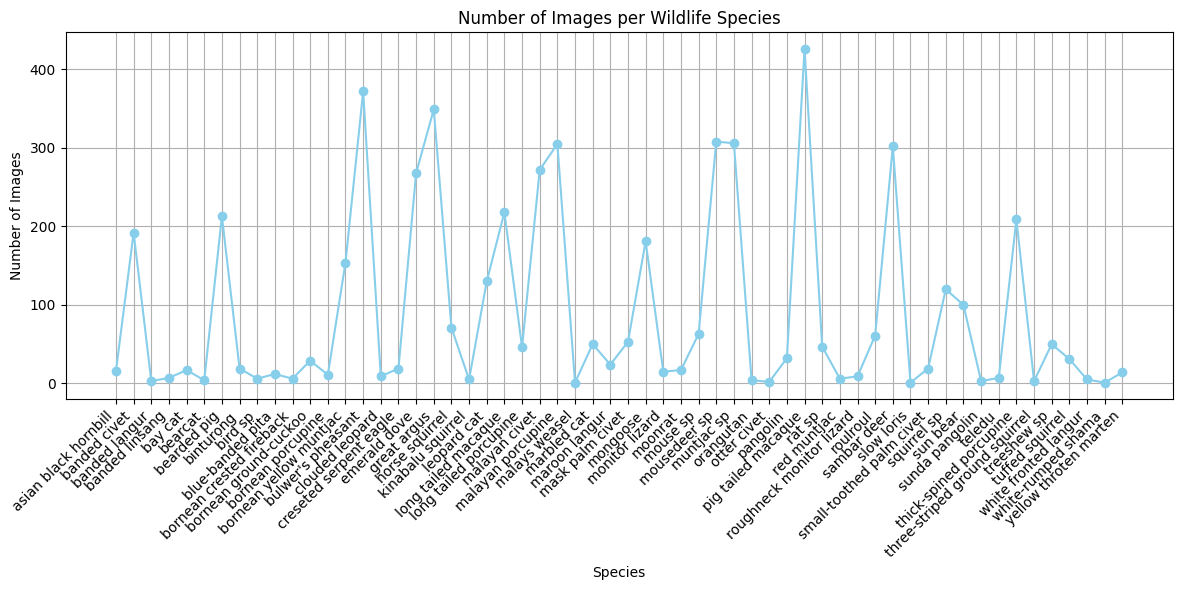

In [14]:
import os
import matplotlib.pyplot as plt

# Path to your dataset directory
data_dir = r"C:\Users\User\yolov5\wildlife\COS30049_cameraTrapHabitatData (anno)\COS30049_camera_trap_images"

# Count the number of species
species_count = {}
for species_dir in os.listdir(data_dir):
    species_path = os.path.join(data_dir, species_dir)
    if os.path.isdir(species_path):
        species_count[species_dir] = len(os.listdir(species_path))

# Print the species count
print("Species count:", species_count)

# Prepare data for the line graph
species_names = list(species_count.keys())
num_images = list(species_count.values())

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(species_names, num_images, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Species')
plt.ylabel('Number of Images')
plt.title('Number of Images per Wildlife Species')
plt.xticks(rotation=45, ha='right')
plt.grid()  # Optional: Add grid lines for better readability
plt.tight_layout()  # Adjust layout to make room for rotated x-axis labels
plt.show()


In [1]:
import os
import shutil
import random
from pathlib import Path

# Paths
data_dir = Path(r"C:\Users\User\yolov5\wildlife\images")  # Path to your dataset directory
output_dir = Path(r"C:/Users/User/yolov5/wildlife/split")  # Path to where you want the split data saved

# Define the split ratios
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15

# Check if the ratios sum to 1
assert train_ratio + val_ratio + test_ratio == 1.0, "Ratios must sum to 1."

# Create directories for train, validation, and test sets
train_dir = output_dir / 'train'
val_dir = output_dir / 'validation'
test_dir = output_dir / 'test'

# Create output directories if they don't exist
train_dir.mkdir(parents=True, exist_ok=True)
val_dir.mkdir(parents=True, exist_ok=True)
test_dir.mkdir(parents=True, exist_ok=True)

# Get a list of all image files in the data directory
images = list(data_dir.glob('*.*'))  # This will match all files with any extension

# Debugging: Check how many images are found
print(f"Total number of images found: {len(images)}")

# Shuffle the images
random.shuffle(images)

# Calculate split indexes
train_idx = int(train_ratio * len(images))
val_idx = train_idx + int(val_ratio * len(images))

# Split images
train_images = images[:train_idx]
val_images = images[train_idx:val_idx]
test_images = images[val_idx:]

# Copy images to their respective directories
for image_set, dest_dir in zip([train_images, val_images, test_images], [train_dir, val_dir, test_dir]):
    for image_path in image_set:
        shutil.copy(image_path, dest_dir / image_path.name)

print("Data split into train, validation, and test sets successfully!")


Total number of images found: 543
Data split into train, validation, and test sets successfully!


In [2]:
import os
import shutil
from pathlib import Path

# Define paths to your directories
train_images_dir = Path(r"C:\Users\User\yolov5\wildlife\split\train")  # Change this to your train images path
val_images_dir = Path(r"C:\Users\User\yolov5\wildlife\split\validation")  # Change this to your validation images path
annotation_dir = Path(r"C:\Users\User\yolov5\wildlife\labels")  # Change this to your annotations path
train_labels_dir = Path(r"C:\Users\User\yolov5\wildlife\split\train")  # Path to copy training labels
val_labels_dir = Path(r"C:\Users\User\yolov5\wildlife\split\validation")  # Path to copy validation labels

# Create directories for copied labels if they don't exist
train_labels_dir.mkdir(parents=True, exist_ok=True)
val_labels_dir.mkdir(parents=True, exist_ok=True)

def check_and_copy_labels(images_dir, labels_dir):
    for image_path in images_dir.glob('*'):
        if image_path.suffix.upper() not in ['.JPG', '.JPEG', '.PNG']:
            continue  # Skip non-image files

        # Corresponding label path
        label_path = annotation_dir / (image_path.stem + '.txt')
        if label_path.exists():
            # Copy the label file to the respective labels directory
            shutil.copy(label_path, labels_dir / label_path.name)
            print(f"Copied label for image: {image_path.name} to {labels_dir}")

# Check and copy labels for training and validation sets
check_and_copy_labels(train_images_dir, train_labels_dir)
check_and_copy_labels(val_images_dir, val_labels_dir)

print("Label checking and copying completed successfully!")


Copied label for image: 001b0a3d-RCNX0046.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 0033cb61-RCNX1347.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 0068762e-RCNX3333.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 008932e9-RCNX3426.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 01419ab6-RCNX5697.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 039fa2c6-RCNX0482.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 042026f4-RCNX0646.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 04b6e48e-RCNX3465.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 05d4cbcb-RCNX5695.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 05e52d26-RCNX2371.JPG to C:\Users\User\yolov5\wildlife\split\train
Copied label for image: 0649edea-RCNX3826.JPG to C:\Users\User\yolov5\wildlife\split\train

<h1>Augmentation Rotation</h1>
<p>but still have problem</p>

In [1]:
import os
import cv2
import albumentations as A
from pathlib import Path
import numpy as np
import hashlib

# Paths
data_dir = Path(r"C:\Users\User\yolov5\wildlife\split\train")  # Path to your training images
augmented_dir = Path(r"C:\Users\User\yolov5\wildlife\split\augmented_train")  # Path to save augmented images
annotation_dir = Path(r"C:\Users\User\yolov5\wildlife\labels")  # Path to your original annotations
augmented_annotation_dir = Path(r"C:/Users/User/yolov5/wildlife/annotations/augmented_train")  # Path to save augmented annotations

# Create directories for augmented images and annotations if they don't exist
augmented_dir.mkdir(parents=True, exist_ok=True)
augmented_annotation_dir.mkdir(parents=True, exist_ok=True)

# Define augmentation transformations
transform = A.Compose([
    A.HorizontalFlip(p=0.5),     # Randomly flip images horizontally
    A.VerticalFlip(p=0.5),       # Randomly flip images vertically
    A.RandomBrightnessContrast(p=0.2),  # Randomly adjust brightness and contrast
])

# Rotation increment and count
rotation_increment = 5  # Degrees
num_rotations = int(360 / rotation_increment)  # Number of rotations

# Function to rotate bounding box coordinates
def rotate_bbox(x_center, y_center, bbox_width, bbox_height, angle, image_shape):
    # Convert to pixel coordinates
    center_x = x_center * image_shape[1]
    center_y = y_center * image_shape[0]

    # Create the rotation matrix
    center = (image_shape[1] // 2, image_shape[0] // 2)  # Rotate around the center
    M = cv2.getRotationMatrix2D(center, angle, 1.0)

    # Create the corners of the bounding box
    box_corners = np.array([
        [center_x - bbox_width / 2, center_y - bbox_height / 2],
        [center_x + bbox_width / 2, center_y - bbox_height / 2],
        [center_x + bbox_width / 2, center_y + bbox_height / 2],
        [center_x - bbox_width / 2, center_y + bbox_height / 2],
    ], dtype=np.float32)

    # Rotate the bounding box corners
    rotated_corners = cv2.transform(box_corners[None, :, :], M)[0]

    # Get the new center and width/height
    new_x_center = (rotated_corners[:, 0].max() + rotated_corners[:, 0].min()) / (2 * image_shape[1])
    new_y_center = (rotated_corners[:, 1].max() + rotated_corners[:, 1].min()) / (2 * image_shape[0])
    new_bbox_width = (rotated_corners[:, 0].max() - rotated_corners[:, 0].min()) / image_shape[1]
    new_bbox_height = (rotated_corners[:, 1].max() - rotated_corners[:, 1].min()) / image_shape[0]

    # Ensure the new bounding box coordinates are normalized
    new_x_center = np.clip(new_x_center, 0, 1)
    new_y_center = np.clip(new_y_center, 0, 1)
    new_bbox_width = np.clip(new_bbox_width, 0, 1)
    new_bbox_height = np.clip(new_bbox_height, 0, 1)

    return new_x_center, new_y_center, new_bbox_width, new_bbox_height

# Function to compute hash of an image
def image_hash(image):
    return hashlib.md5(image).hexdigest()

# Create a set to track unique hashes
seen_hashes = set()

# Process each image in the training directory
for image_path in data_dir.glob('*'):
    # Check if the file is an image with .JPG extension
    if image_path.suffix.upper() not in ['.JPG', '.JPEG', '.PNG']:
        continue  # Skip non-image files

    # Read the original image
    image = cv2.imread(str(image_path))
    if image is None:
        print(f"Failed to read image: {image_path}")
        continue  # Skip if the image could not be read

    # Read the corresponding YOLO annotation file
    annotation_path = annotation_dir / (image_path.stem + '.txt')
    if annotation_path.exists():
        with open(annotation_path, 'r') as f:
            annotations = f.readlines()
    else:
        print(f"No annotation file found for: {image_path}")
        continue  # Skip if no annotation exists

    # Process each rotation
    for i in range(num_rotations):
        angle = rotation_increment * i + np.random.uniform(-2.5, 2.5)  # Small random variation in angle

        # Create a list to hold new annotations
        new_annotations = []

        # Apply transformations
        augmented = transform(image=image)
        augmented_image = augmented['image']

        # Process annotations to adjust bounding boxes
        for line in annotations:
            class_id, x_center, y_center, bbox_width, bbox_height = map(float, line.strip().split())

            # Rotate the bounding box and get new coordinates
            new_x_center, new_y_center, new_bbox_width, new_bbox_height = rotate_bbox(
                x_center, y_center, bbox_width, bbox_height, angle, image.shape
            )

            # Add the new annotation
            new_annotations.append(f"{int(class_id)} {new_x_center} {new_y_center} {new_bbox_width} {new_bbox_height}\n")

        # Generate a unique filename for the augmented image
        augmented_image_path = augmented_dir / f"{image_path.stem}_aug_{i+1}.jpg"  # Change file name to reflect augmentation

        # Check for duplicates using the image hash
        augmented_image_bytes = cv2.imencode('.jpg', augmented_image)[1].tobytes()
        img_hash = image_hash(augmented_image_bytes)

        if img_hash not in seen_hashes:
            seen_hashes.add(img_hash)
            # Save the augmented image
            cv2.imwrite(str(augmented_image_path), augmented_image)
            print(f"Saved augmented image to: {augmented_image_path}")

            # Save new annotations with a corresponding unique filename
            augmented_annotation_path = augmented_annotation_dir / f"{image_path.stem}_aug_{i+1}.txt"
            with open(augmented_annotation_path, 'w') as f:
                f.writelines(new_annotations)
            print(f"Saved new annotations to: {augmented_annotation_path}")
        else:
            print(f"Duplicate image found, skipping: {augmented_image_path}")

print("Augmentation and re-annotation completed successfully!")


Saved augmented image to: C:\Users\User\yolov5\wildlife\split\augmented_train\001b0a3d-RCNX0046_aug_1.jpg
Saved new annotations to: C:\Users\User\yolov5\wildlife\annotations\augmented_train\001b0a3d-RCNX0046_aug_1.txt
Saved augmented image to: C:\Users\User\yolov5\wildlife\split\augmented_train\001b0a3d-RCNX0046_aug_2.jpg
Saved new annotations to: C:\Users\User\yolov5\wildlife\annotations\augmented_train\001b0a3d-RCNX0046_aug_2.txt
Duplicate image found, skipping: C:\Users\User\yolov5\wildlife\split\augmented_train\001b0a3d-RCNX0046_aug_3.jpg
Duplicate image found, skipping: C:\Users\User\yolov5\wildlife\split\augmented_train\001b0a3d-RCNX0046_aug_4.jpg
Saved augmented image to: C:\Users\User\yolov5\wildlife\split\augmented_train\001b0a3d-RCNX0046_aug_5.jpg
Saved new annotations to: C:\Users\User\yolov5\wildlife\annotations\augmented_train\001b0a3d-RCNX0046_aug_5.txt
Saved augmented image to: C:\Users\User\yolov5\wildlife\split\augmented_train\001b0a3d-RCNX0046_aug_6.jpg
Saved new anno

In [57]:
import os
from pathlib import Path

# Path to the augmented images directory
augmented_dir = Path(r"C:/Users/User/yolov5/wildlife/resize_image/augmented_train")  # Adjust this path if needed

# Count the number of images
image_count = len(list(augmented_dir.glob('*.JPG')))  # Change '*.JPG' to '*.jpg' if the case matters

print(f"Total augmented images: {image_count}")


Total augmented images: 7070


In [58]:
import os
import hashlib
from pathlib import Path

# Define the directory containing the images
image_dir = Path(r"C:/Users/User/yolov5/wildlife/resize_image/augmented_train")  # Adjust the path as needed

# Store hashes and paths of images
hashes = {}
duplicates = []

# Iterate through all .JPG files in the directory
for image_path in image_dir.glob('*.JPG'):
    with open(image_path, 'rb') as f:
        # Read the image file
        file_data = f.read()
        # Calculate the hash of the file
        file_hash = hashlib.md5(file_data).hexdigest()  # You can use any hash function, MD5 is just a common choice

        # Check for duplicates
        if file_hash in hashes:
            duplicates.append((hashes[file_hash], image_path))  # Store the paths of duplicate images
        else:
            hashes[file_hash] = image_path  # Store the hash and corresponding image path

# Print duplicates
if duplicates:
    print("Duplicate images found:")
    for original, duplicate in duplicates:
        print(f"Original: {original}, Duplicate: {duplicate}")
else:
    print("No duplicate images found.")

print(len(duplicates))

No duplicate images found.
0


In [3]:
import os
import torch

# Set the CUDA device (if multiple GPUs are available)
os.environ['CUDA_VISIBLE_DEVICES'] = '0'  # Specify the GPU ID to use; '0' indicates the first GPU.

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA Available: True")
    device = torch.device("cuda")  # Use GPU
else:
    print("CUDA Available: False")
    device = torch.device("cpu")  # Use CPU

# Display GPU device information
print(f"Current Device: {device}")
print(f"Device Name: {torch.cuda.get_device_name(0) if device.type == 'cuda' else 'CPU'}")

# Set GPU memory growth (to avoid out-of-memory errors)
torch.backends.cudnn.benchmark = True  # Enable cuDNN benchmarking for performance improvement

# Clear PyTorch cache (optional)
torch.cuda.empty_cache()

# If you want to use mixed precision training, you can enable AMP
# torch.cuda.amp.autocast() should be used during model training

CUDA Available: True
Current Device: cuda
Device Name: NVIDIA GeForce RTX 4050 Laptop GPU


<h1>Yolov5</h1>

In [ ]:
import subprocess

# Define parameters
img_size = 640
batch_size = 16
epochs = 10
data_yaml = r"C:\Users\User\yolov5\wildlife\data.yaml"
weights = "yolov5s.pt" 
device = "cuda:0"
cache = True

# Build the training command
train_command = f"python train.py --img {img_size} --batch {batch_size} --epochs {epochs} --data \"{data_yaml}\" --weights {weights} --cache --device {device}"

# Execute the training command
result = subprocess.run(train_command, shell=True, text=True, capture_output=True)

# Print the output
print(result.stdout)  # Print the standard output of the command
print(result.stderr)  # Print any error messages (if any)


DataFrame shape: (10, 14)
DataFrame head:
                   epoch        train/box_loss        train/obj_loss  \
0                     0              0.107830              0.030071   
1                     1              0.080803              0.027979   
2                     2              0.072701              0.025231   
3                     3              0.069525              0.021215   
4                     4              0.067361              0.019660   

         train/cls_loss     metrics/precision        metrics/recall  \
0              0.097275               0.00487               0.18137   
1              0.075007               0.75496               0.15524   
2              0.053893               0.79461               0.13203   
3              0.044471               0.81362               0.15011   
4              0.038232               0.84215               0.18001   

        metrics/mAP_0.5  metrics/mAP_0.5:0.95          val/box_loss  \
0              0.006099         

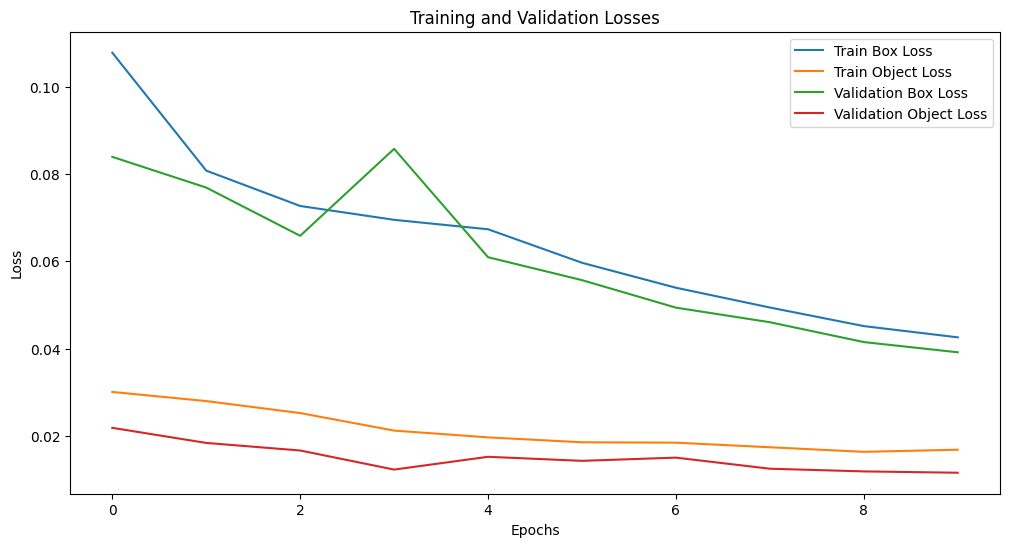

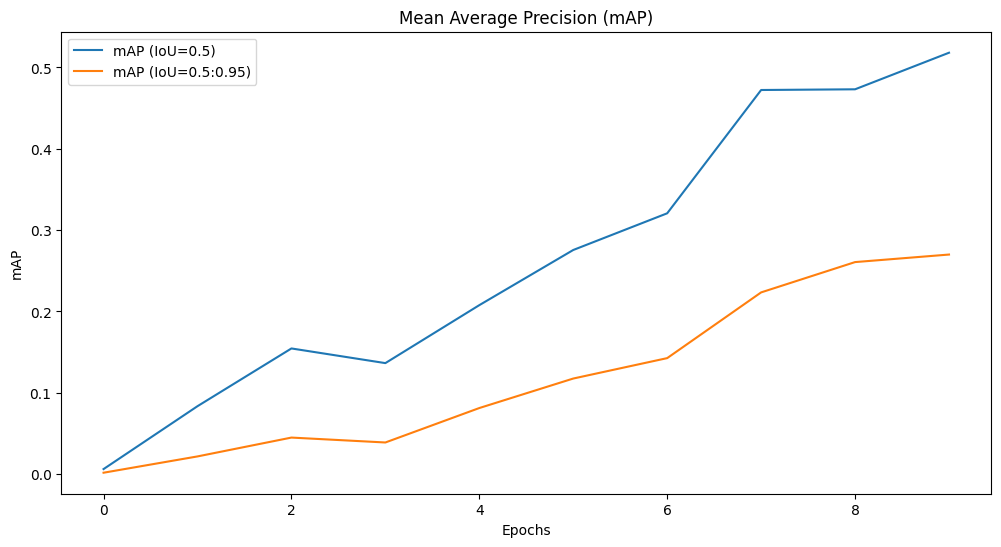

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the training results
results_file = r"C:\Users\User\yolov5\runs\train\exp3\results.csv"  # Update to your path
results = pd.read_csv(results_file)

# Print the DataFrame's shape, first few rows, and columns
print("DataFrame shape:", results.shape)
print("DataFrame head:\n", results.head())
print("Columns:", results.columns.tolist())

# Strip any leading or trailing whitespace from the column names
results.columns = results.columns.str.strip()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(results['epoch'], results['train/box_loss'], label='Train Box Loss')
plt.plot(results['epoch'], results['train/obj_loss'], label='Train Object Loss')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss')
plt.plot(results['epoch'], results['val/obj_loss'], label='Validation Object Loss')
plt.title('Training and Validation Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot metrics (mAP)
plt.figure(figsize=(12, 6))
plt.plot(results['epoch'], results['metrics/mAP_0.5'], label='mAP (IoU=0.5)')
plt.plot(results['epoch'], results['metrics/mAP_0.5:0.95'], label='mAP (IoU=0.5:0.95)')
plt.title('Mean Average Precision (mAP)')
plt.xlabel('Epochs')
plt.ylabel('mAP')
plt.legend()
plt.show()


<h1>Yolov8</h1>

In [1]:
from ultralytics import YOLO

# Initialize the YOLOv8 model
model = YOLO("yolov8n.pt")  # Replace with other models like yolov8s.pt, yolov8m.pt, etc.

# Train the model with augmentations
model.train(
    data=r"C:\Users\User\yolov5\wildlife\data.yaml",  # Path to your data.yaml file
    epochs=20,                    # Number of epochs
    imgsz=640,                    # Image size
    batch=16,                     # Batch size
    augment=True,                 # Enable default augmentations
    degrees=5.0,                  # Set rotation degrees (e.g., 5 degrees)
    translate=0.1,                # Allow up to 10% translation
    scale=0.5,                    # Scaling factor (up to 50% zoom in/out)
    shear=0.1,                    # Shearing of 10%
    flipud=0.0,                   # Vertical flip probability (0 = no vertical flips)
    fliplr=0.5,                   # Horizontal flip probability (0.5 = 50% of images)
    mosaic=1.0                    # Mosaic augmentation probability (1.0 = always applied)
)


New https://pypi.org/project/ultralytics/8.3.27 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.22  Python-3.10.15 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=C:\Users\User\yolov5\wildlife\data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, 

train: Scanning C:\Users\User\yolov5\wildlife\split\train.cache... 380 images, 0 backgrounds, 0 corrupt: 100%|██████████| 380/380 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


c:\Users\User\anaconda3\envs\yolo_env\lib\site-packages\albumentations\__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning C:\Users\User\yolov5\wildlife\split\validation.cache... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<?, ?it/s]


Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000161, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train3
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.46G      1.741       5.48      1.718         26        640: 100%|██████████| 24/24 [00:04<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.97it/s]

                   all         81         93          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20       2.4G      1.618      4.944      1.575         31        640: 100%|██████████| 24/24 [00:02<00:00,  8.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 13.91it/s]

                   all         81         93      0.146      0.196      0.145     0.0998



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       2.4G      1.556      3.745      1.448         33        640: 100%|██████████| 24/24 [00:02<00:00,  8.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.65it/s]

                   all         81         93      0.403      0.162      0.256      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20       2.4G      1.497      3.125      1.374         40        640: 100%|██████████| 24/24 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.27it/s]

                   all         81         93      0.824      0.234      0.359      0.253



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20       2.4G      1.357      2.614      1.286         33        640: 100%|██████████| 24/24 [00:05<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.25it/s]

                   all         81         93      0.869      0.299      0.438      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20       2.4G      1.325      2.283      1.286         34        640: 100%|██████████| 24/24 [00:07<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.28it/s]

                   all         81         93      0.793      0.412      0.449      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20       2.4G      1.324       2.23       1.28         30        640: 100%|██████████| 24/24 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         81         93      0.769      0.463      0.516      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      2.43G      1.272      1.994       1.25         19        640: 100%|██████████| 24/24 [00:07<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]

                   all         81         93      0.595      0.737      0.615       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20       2.4G      1.301       2.08      1.271         17        640: 100%|██████████| 24/24 [00:07<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

                   all         81         93      0.799      0.699      0.672      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20       2.4G      1.229      1.849      1.234         22        640: 100%|██████████| 24/24 [00:07<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.22it/s]

                   all         81         93      0.811      0.723       0.71      0.439


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       2.4G      1.225      2.416      1.227         15        640: 100%|██████████| 24/24 [00:03<00:00,  7.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.20it/s]

                   all         81         93      0.929      0.571       0.72      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20       2.4G      1.195      2.323      1.202         13        640: 100%|██████████| 24/24 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.66it/s]

                   all         81         93      0.774      0.685      0.722      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20       2.4G        1.1      2.156      1.173         13        640: 100%|██████████| 24/24 [00:02<00:00,  8.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.66it/s]

                   all         81         93      0.819      0.727      0.749       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20       2.4G       1.12      2.143      1.162         14        640: 100%|██████████| 24/24 [00:02<00:00,  8.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.15it/s]

                   all         81         93      0.848      0.744       0.75      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20       2.4G      1.136      2.098      1.136         13        640: 100%|██████████| 24/24 [00:02<00:00,  8.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.78it/s]

                   all         81         93      0.916      0.712      0.774      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       2.4G      1.087      2.063      1.131         14        640: 100%|██████████| 24/24 [00:02<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.97it/s]

                   all         81         93      0.942      0.686      0.782      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20       2.4G      1.087      2.036      1.136         14        640: 100%|██████████| 24/24 [00:02<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 11.53it/s]

                   all         81         93      0.902      0.707      0.774      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20       2.4G       1.06      1.992      1.132         15        640: 100%|██████████| 24/24 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.13it/s]

                   all         81         93      0.901      0.719      0.777      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       2.4G      1.056      1.982      1.132         13        640: 100%|██████████| 24/24 [00:02<00:00,  8.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00, 10.82it/s]

                   all         81         93      0.959      0.703      0.784      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20       2.4G      1.048      1.957      1.113         13        640: 100%|██████████| 24/24 [00:02<00:00,  8.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.53it/s]

                   all         81         93      0.938      0.702      0.783      0.487



20 epochs completed in 0.035 hours.
Optimizer stripped from runs\detect\train3\weights\last.pt, 6.3MB
Optimizer stripped from runs\detect\train3\weights\best.pt, 6.3MB

Validating runs\detect\train3\weights\best.pt...
Ultralytics 8.3.22  Python-3.10.15 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 168 layers, 3,016,958 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.58it/s]


                   all         81         93      0.848      0.753       0.75      0.488
small-toothed palm civet          1          1          1          0          0          0
           squirrel sp         21         21      0.811      0.714      0.759      0.336
              sun bear         10         11       0.98          1      0.995      0.732
thick-spined porcupine         32         43      0.947      0.977      0.966      0.641
           treeshew sp         12         12      0.756      0.583      0.671      0.378
       tufted squirrel          3          3      0.589          1      0.863      0.512
yellow-throated marten          2          2      0.849          1      0.995      0.821
Speed: 0.3ms preprocess, 6.7ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([46, 47, 48, 51, 53, 54, 57])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001B2EE987D30>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0

<p>Test with validation set</p>

In [2]:
# Run evaluation on the test dataset
metrics = model.val(
    data=r"C:\Users\User\yolov5\wildlife\data.yaml",  # Path to your data.yaml file
    imgsz=640,                                       # Image size
    batch=16                                         # Batch size
)

# Print the evaluation metrics
print(metrics)


Ultralytics 8.3.22  Python-3.10.15 torch-2.0.0+cu118 CUDA:0 (NVIDIA GeForce RTX 4050 Laptop GPU, 6140MiB)
Model summary (fused): 168 layers, 3,016,958 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning C:\Users\User\yolov5\wildlife\split\validation.cache... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.49it/s]


                   all         81         93      0.818       0.74      0.727      0.478
small-toothed palm civet          1          1          1          0          0          0
           squirrel sp         21         21      0.612      0.619      0.595      0.255
              sun bear         10         11      0.975          1      0.995       0.73
thick-spined porcupine         32         43      0.947      0.977      0.965      0.647
           treeshew sp         12         12      0.756      0.583      0.674       0.38
       tufted squirrel          3          3      0.591          1      0.863      0.512
yellow-throated marten          2          2      0.849          1      0.995      0.821
Speed: 0.9ms preprocess, 15.3ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs\detect\train32
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([46, 47, 48, 51, 53, 54, 57])
box: ultralytics.utils.metrics.Metric object
confusi

<p>Test with test set</p>

In [6]:
from ultralytics import YOLO

# Load the model
model = YOLO(r"C:\Users\User\OneDrive\Documents\GitHub\Yolo\yolo\runs\detect\train3\weights\best.pt")  # Path to your trained model

# Predict on a single image or a folder of test images
results = model.predict(
    source=r"C:\Users\User\OneDrive\Documents\GitHub\Yolo\yolo\wildlife\split\test",  # Path to test images folder
    imgsz=640,                                           # Image size
    conf=0.25,                                           # Confidence threshold
    save=True                                            # Save output images with predictions
)

# Display results
for result in results:
    print(result)  # Prints detection information for each image



image 1/82 C:\Users\User\OneDrive\Documents\GitHub\Yolo\yolo\wildlife\split\test\024d08d2-RCNX0726.JPG: 384x640 1 treeshew sp, 60.7ms
image 2/82 C:\Users\User\OneDrive\Documents\GitHub\Yolo\yolo\wildlife\split\test\02fbb2f5-RCNX1957.JPG: 384x640 1 sun bear, 22.0ms
image 3/82 C:\Users\User\OneDrive\Documents\GitHub\Yolo\yolo\wildlife\split\test\0bf37dc8-RCNX2260.JPG: 384x640 1 thick-spined porcupine, 19.2ms
image 4/82 C:\Users\User\OneDrive\Documents\GitHub\Yolo\yolo\wildlife\split\test\0c169828-RCNX0323.JPG: 384x640 1 thick-spined porcupine, 20.0ms
image 5/82 C:\Users\User\OneDrive\Documents\GitHub\Yolo\yolo\wildlife\split\test\0d2d5d68-RCNX1850.JPG: 384x640 1 squirrel sp, 20.1ms
image 6/82 C:\Users\User\OneDrive\Documents\GitHub\Yolo\yolo\wildlife\split\test\0e343bf2-RCNX1702.JPG: 384x640 1 thick-spined porcupine, 18.9ms
image 7/82 C:\Users\User\OneDrive\Documents\GitHub\Yolo\yolo\wildlife\split\test\140d8ee0-IMG_1097.JPG: 480x640 1 tufted squirrel, 62.6ms
image 8/82 C:\Users\User\On